# Mushroom Classification

In [2]:
# 그래프에 필요한 모듈 import
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [179]:
# 테스트에 필요한 모듈 import
from sklearn.linear_model import LogisticRegression  # Logistic Regression algorithm
from sklearn.model_selection import train_test_split # train, test data 분리
from sklearn import svm  # Support Vector Machine (SVM) Algorithm
from sklearn.neighbors import KNeighborsClassifier  # K nearest neighbours(KNN)
from sklearn import metrics # 모델 정확도 확인
from sklearn.tree import DecisionTreeClassifier # Decision Tree Algoithm
from sklearn import preprocessing
%matplotlib inline

In [180]:
# warnings 무시
import warnings
warnings.filterwarnings(action='ignore')

In [181]:
# csv 파일 읽기
mush=pd.read_csv('C:\\Users\\uni61\Documents\GitHub\SongKim\mushrooms.csv') 

In [182]:
mush.head(3) 

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m


In [183]:
# mushroom.csv 정보
mush.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8124 entries, 0 to 8123
Data columns (total 23 columns):
class                       8124 non-null object
cap-shape                   8124 non-null object
cap-surface                 8124 non-null object
cap-color                   8124 non-null object
bruises                     8124 non-null object
odor                        8124 non-null object
gill-attachment             8124 non-null object
gill-spacing                8124 non-null object
gill-size                   8124 non-null object
gill-color                  8124 non-null object
stalk-shape                 8124 non-null object
stalk-root                  8124 non-null object
stalk-surface-above-ring    8124 non-null object
stalk-surface-below-ring    8124 non-null object
stalk-color-above-ring      8124 non-null object
stalk-color-below-ring      8124 non-null object
veil-type                   8124 non-null object
veil-color                  8124 non-null object
ring-number

#
cap color, odor 특징을 분석한다.

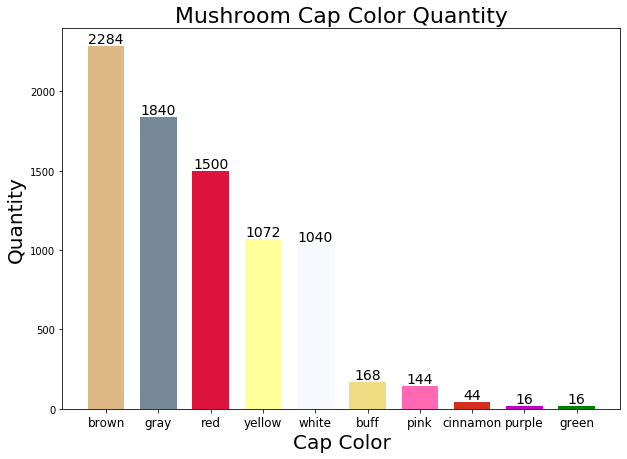

In [184]:
# cap color 막대 그래프

# 각각의 cap color에 서로 다른 숫자를 부여한다.
cap_colors = mush['cap-color'].value_counts()
m_height = cap_colors.values.tolist()
cap_colors.axes 
cap_color_labels = cap_colors.axes[0].tolist()

ind = np.arange(10)  # 막대 간격
width = 0.7 # 막대 너비
colors = ['#DEB887','#778899','#DC143C','#FFFF99','#f8f8ff','#F0DC82','#FF69B4','#D22D1E','#C000C5','g']
#FFFFF0
fig, ax = plt.subplots(figsize=(10,7))
mush_bars = ax.bar(ind, m_height , width, color=colors)

ax.set_xlabel("Cap Color",fontsize=20)
ax.set_ylabel('Quantity',fontsize=20)
ax.set_title('Mushroom Cap Color Quantity',fontsize=22)
ax.set_xticks(ind)
ax.set_xticklabels(('brown', 'gray','red','yellow','white','buff','pink','cinnamon','purple','green'),
                  fontsize = 12)

# 각 막대에 머쉬룸 수 표시
def autolabel(rects,fontsize=14):
    """
    Attach a text label above each bar displaying its height
    """
    for rect in rects:
        height = rect.get_height()
        ax.text(rect.get_x() + rect.get_width()/2., 1*height,'%d' % int(height),
                ha='center', va='bottom',fontsize=fontsize)
autolabel(mush_bars)        
plt.show()

색에 따른 버섯의 독 유무를 확인한다.

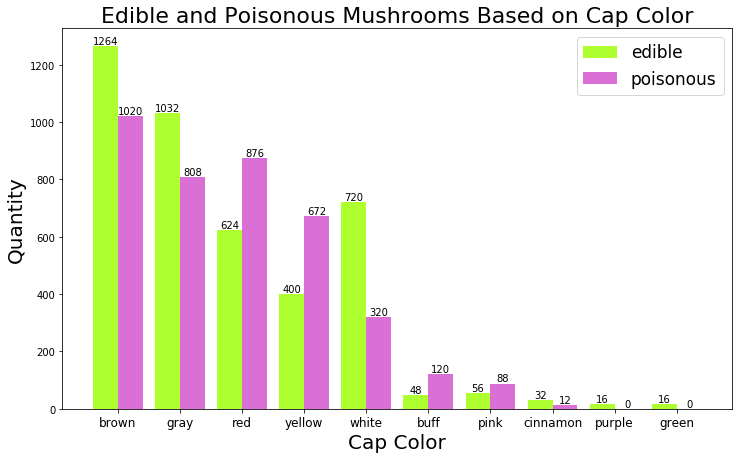

[1264, 1032, 624, 400, 720, 48, 56, 32, 16, 16]
[1020, 808, 876, 672, 320, 120, 88, 12, 0, 0]


In [185]:
poisonous_cc = [] #Poisonous color cap list
edible_cc = []    #Edible color cap list
for capColor in cap_color_labels:
    size = len(mush[mush['cap-color'] == capColor].index)
    edibles = len(mush[(mush['cap-color'] == capColor) & (mush['class'] == 'e')].index)
    edible_cc.append(edibles)
    poisonous_cc.append(size-edibles)
                        
#=====PLOT Preparations and Plotting====#
width = 0.40
fig, ax = plt.subplots(figsize=(12,7))
edible_bars = ax.bar(ind, edible_cc , width, color='#ADFF2F')
poison_bars = ax.bar(ind+width, poisonous_cc , width, color='#DA70D6')

#Add some text for labels, title and axes ticks
ax.set_xlabel("Cap Color",fontsize=20)
ax.set_ylabel('Quantity',fontsize=20)
ax.set_title('Edible and Poisonous Mushrooms Based on Cap Color',fontsize=22)
ax.set_xticks(ind + width / 2) #Positioning on the x axis
ax.set_xticklabels(('brown', 'gray','red','yellow','white','buff','pink','cinnamon','purple','green'),
                  fontsize = 12)
ax.legend((edible_bars,poison_bars),('edible','poisonous'),fontsize=17)
autolabel(edible_bars, 10)
autolabel(poison_bars, 10)
plt.show()
print(edible_cc)
print(poisonous_cc)

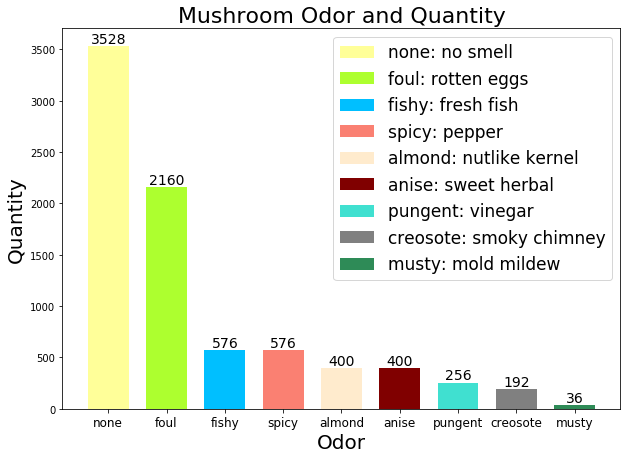

In [186]:
# odor 막대 그래프

odors = mush['odor'].value_counts()
odor_height = odors.values.tolist()
odor_labels = odors.axes[0].tolist()

width = 0.7 
ind = np.arange(9)
colors = ['#FFFF99','#ADFF2F','#00BFFF','#FA8072','#FFEBCD','#800000','#40E0D0','#808080','#2E8B57']

fig, ax = plt.subplots(figsize=(10,7))
odor_bars = ax.bar(ind, odor_height , width, color=colors)

ax.set_xlabel("Odor",fontsize=20)
ax.set_ylabel('Quantity',fontsize=20)
ax.set_title('Mushroom Odor and Quantity',fontsize=22)
ax.set_xticks(ind)
ax.set_xticklabels(('none', 'foul','fishy','spicy','almond','anise','pungent','creosote','musty'),
                  fontsize = 12)
ax.legend(odor_bars, ['none: no smell','foul: rotten eggs', 'fishy: fresh fish','spicy: pepper',
                      'almond: nutlike kernel', 'anise: sweet herbal', 'pungent: vinegar',
                     'creosote: smoky chimney', 'musty: mold mildew'],fontsize=17)
autolabel(odor_bars)        
plt.show()

냄새에 따른 독 유무를 확인한다.

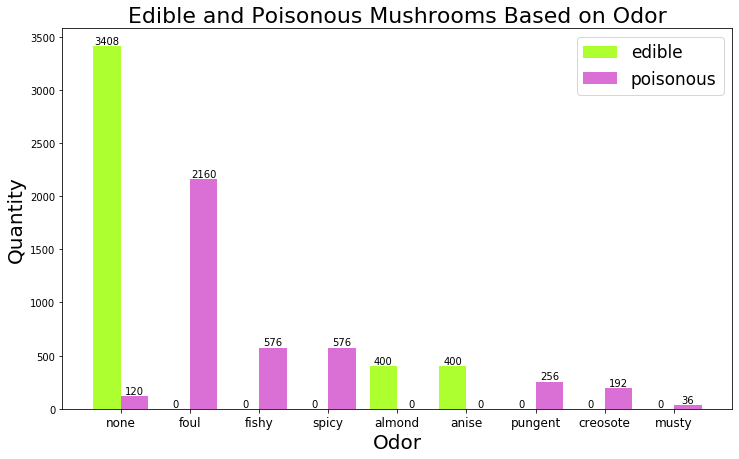

[3408, 0, 0, 0, 400, 400, 0, 0, 0]
[120, 2160, 576, 576, 0, 0, 256, 192, 36]


In [187]:
poisonous_od = []
edible_od = []
for odor in odor_labels:
    size = len(mush[mush['odor'] == odor].index)
    edibles = len(mush[(mush['odor'] == odor) & (mush['class'] == 'e')].index)
    edible_od.append(edibles)
    poisonous_od.append(size-edibles)
                        
width = 0.40
fig, ax = plt.subplots(figsize=(12,7))
edible_bars = ax.bar(ind, edible_od , width, color='#ADFF2F')
poison_bars = ax.bar(ind+width, poisonous_od , width, color='#DA70D6')

ax.set_xlabel("Odor",fontsize=20)
ax.set_ylabel('Quantity',fontsize=20)
ax.set_title('Edible and Poisonous Mushrooms Based on Odor',fontsize=22)
ax.set_xticks(ind + width / 2)
ax.set_xticklabels(('none', 'foul','fishy','spicy','almond','anise','pungent','creosote','musty'),
                  fontsize = 12)
ax.legend((edible_bars,poison_bars),('edible','poisonous'),fontsize=17)
autolabel(edible_bars, 10)
autolabel(poison_bars, 10)
plt.show()
print(edible_od)
print(poisonous_od)


위 그래프 분석 결과 다음을 알 수 있다.
1. cap color와 odor의 결과를 비교했을 때, odor 기준으로 독의 유무를 더 정확하게 파악할 수 있다.
2. 일반적으로 자극적이거나 불쾌한 냄새가 나는 버섯이 독버섯이다. ('foul', 'fish', 'spicy' 등)
3. 'almond'향이나 'anise'향은 독버섯이 아니다.
4. 냄새가 나지 않는 버섯 중 극히 일부도 독버섯일 수 있다.

# 
ML

In [246]:
# 알파벳을 숫자로 바꾸기
labelEncoder = preprocessing.LabelEncoder()
for col in mush.columns:
    mush[col] = labelEncoder.fit_transform(mush[col])

In [247]:
# mush data를 train data와 test data로 나누기
(train, test)=train_test_split(mush, test_size = 0.3)

In [248]:
train_x = train[[x for x in train.columns if 'class' not in x]] # train data 인풋
train_y = train['class'] # train data 아웃풋

test_x = test[[x for x in test.columns if 'class' not in x]] # test data 인풋
test_y = test['class'] # test data 아웃풋

In [249]:
train_x.head() # train data 보기

,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,stalk-shape,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
7256,3,3,2,0,2,1,0,1,0,1,...,2,7,6,0,2,1,0,7,4,0
6177,2,2,2,0,2,1,0,1,0,1,...,2,7,7,0,2,1,0,7,4,4
6855,3,3,4,0,4,1,0,0,10,0,...,3,1,1,0,2,0,3,7,1,0
4601,2,0,9,0,2,1,0,0,2,0,...,1,6,4,0,2,1,2,1,4,1
5605,2,2,8,1,5,1,0,0,8,0,...,2,7,7,0,2,2,4,5,4,3


In [250]:
test_x.head() # test data 보기

,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,stalk-shape,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
3187,5,0,3,0,2,1,0,0,2,0,...,1,0,0,0,2,1,2,1,4,0
1575,2,2,8,0,5,1,1,0,4,1,...,0,7,7,0,2,1,0,2,0,1
7043,3,3,4,0,7,1,0,1,0,1,...,2,6,7,0,2,1,0,7,4,2
6289,2,2,4,0,7,1,0,1,0,1,...,2,6,7,0,2,1,0,7,4,0
2338,5,0,4,1,5,1,0,0,10,1,...,2,7,3,0,2,1,4,3,5,0


In [251]:
train_y.head()

7256    1
6177    1
6855    1
4601    1
5605    1
Name: class, dtype: int64

In [252]:
# SVM model
model = svm.SVC(gamma='auto')
model.fit(train_x,train_y) # train data로 학습시킨다.
prediction=model.predict(test_x) # 학습시킨 모델에 test data로 결과를 예측한다.
print('The accuracy of the SVM is:',metrics.accuracy_score(prediction,test_y)) # 정확도 결과

The accuracy of the SVM is: 1.0


In [253]:
# Logistic Regression
model = LogisticRegression(solver='lbfgs', multi_class='auto')
model.fit(train_x,train_y)
prediction=model.predict(test_x)
print('The accuracy of the Logistic Regression is',metrics.accuracy_score(prediction,test_y))

The accuracy of the Logistic Regression is 0.9565217391304348


In [254]:
# Decision Tree Classifier
model=DecisionTreeClassifier()
model.fit(train_x,train_y)
prediction=model.predict(test_x)
print('The accuracy of the Decision Tree is',metrics.accuracy_score(prediction,test_y))

The accuracy of the Decision Tree is 1.0


In [255]:
# KNN model (neighbors = 3 일때)
model=KNeighborsClassifier(n_neighbors=3) #this examines 3 neighbours for putting the new data into a class
model.fit(train_x,train_y)
prediction=model.predict(test_x)
print('The accuracy of the KNN is',metrics.accuracy_score(prediction,test_y))

The accuracy of the KNN is 0.9995898277276456


([<matplotlib.axis.XTick at 0x16d6ed57ac8>,
 <a list of 10 Text xticklabel objects>)

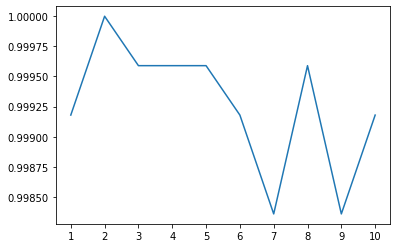

In [256]:
# neighbor 수에 따른 KNN모델의 정확도
a_index=list(range(1,11))
a=pd.Series()
x=[1,2,3,4,5,6,7,8,9,10]
for i in list(range(1,11)): # 1~10 neighbors
    model=KNeighborsClassifier(n_neighbors=i) 
    model.fit(train_x,train_y)
    prediction=model.predict(test_x)
    a=a.append(pd.Series(metrics.accuracy_score(prediction,test_y)))
plt.plot(a_index, a)
plt.xticks(x)

Cap Color와 Odor 비교

In [257]:
# cap color와 odor data 분리
cap_color=mush[['cap-color','class']]
odor=mush[['odor','class']]

In [265]:
# cap color train data, test data
(train_c,test_c)=train_test_split(cap_color,test_size=0.3,random_state=0)
train_x_c=train_c[['cap-color']]
train_y_c = train_c['class']
test_x_c=test_c[['cap-color']]
test_y_c = test_c['class']

# odor train data, test data
(train_o,test_o)=train_test_split(odor,test_size=0.3,random_state=0)
train_x_o=train_o[['odor']]
train_y_o = train_o['class']
test_x_o=test_o[['odor']]
test_y_o = test_o['class']


In [267]:
# SVM model
model=svm.SVC()
model.fit(train_x_c,train_y_c) 
prediction=model.predict(test_x_c) 
print('The accuracy of the SVM using cap color is:',metrics.accuracy_score(prediction,test_y_c))

model=svm.SVC()
model.fit(train_x_o,train_y_o) 
prediction=model.predict(test_x_o) 
print('The accuracy of the SVM using odor is:',metrics.accuracy_score(prediction,test_y_o))

The accuracy of the SVM using cap color is: 0.6000820344544708
The accuracy of the SVM using odor is: 0.9864643150123051


cap color보다 odor가 더 정확도가 높다.